Mounting the Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Importing Libraries

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
from sympy import *
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import math
import random

Defining function for finding Euclidian Distance: D(x,y) = sqrt[(x₁ - x₂)² + (y₁ - y₂)²]

In [0]:
def EuDist(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

Function for Plotting K means random clusters for k = 1 to 10.

In [0]:
def KMeans(X,Y,data):

    k=len(X)

    l=[ [] for xy in range(k)]

    for i in range(0, len(data)):
        
        K_min=0
        distance_eu = EuDist(data[i][0], data[i][1], X[0], Y[0])

        for k1 in range(0,k):
            distance1 = EuDist(data[i][0],data[i][1],X[k1],Y[k1])

            if distance1<distance_eu:
                K_min = k1
                distance_eu = distance1

        l[K_min].append(i)

    colors=['#0000FF','#FF0000','#00FF00','#00FFFF','#FF00FF','#FFFF00','#808080','#FA8072','#7D6608','#34495E']
    name=['k=1','k=2','k=3','k=4','k=5','k=6','k=7','k=8','k=9','k=10']

    fig, ax = plt.subplots()
    ax.margins(0.05) 

    plt.scatter(X,Y,marker="H", color="black", s=110, label='Centroid')

    for j in range(0,k):
        x_1=[i for i in l[j]]
        ax.plot(data[x_1,0], data[x_1,1], marker='.', linestyle='', ms=8, c=colors[j], label=name[j])

    ax.legend()
    plt.show()

Function for Elbow Distance.

In [0]:
def elbowDistance(X,Y,data):

    k=len(X)
    totalDistance=0
    
    for i in range(0, len(data)):

        K_min=0
        distance_eu = EuDist(data[i][0], data[i][1], X[0], Y[0])

        for k1 in range(0,k):
            distance1 = EuDist(data[i][0],data[i][1],X[k1],Y[k1])

            if distance1<distance_eu:
                K_min = k1
                distance_eu = distance1

        totalDistance+=distance_eu

    return totalDistance/len(data)

**####################################################################**

**Question 1 -** Visualizing the data from the files.

> Dataset 1 : File- ex2data1-logistic.xls

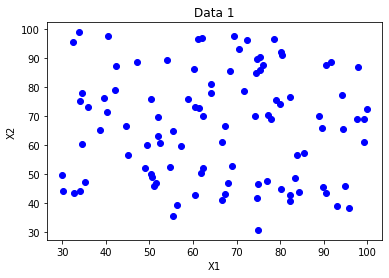

In [85]:
data1=pd.read_excel('/content/drive/My Drive/IE406- ML- Labs/Lab 7/ex2data1-logistic.xls')
data1=np.array(data1)

plt.scatter(data1[:,0],data1[:,1], color="#0000FF")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 1')
plt.show()

**-------------------------------------------------------------------------------------------**

> Dataset 2 : File- kmeans_data.xlsx

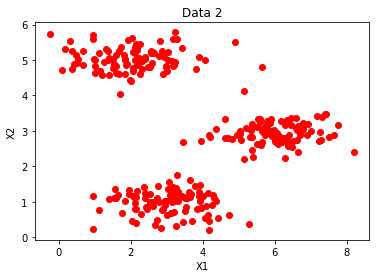

In [86]:
data2=pd.read_excel('/content/drive/My Drive/IE406- ML- Labs/Lab 7/kmeans_data.xlsx')
data2=np.array(data2)

plt.scatter(data2[:,0],data2[:,1], color="#FF0000")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data 2')
plt.show()

**####################################################################**

**Question 2,3 -**	Using random initial cluster centers and trying the algorithm for different values for K. (i.e. k=1,2,3, …, 10) and Visualizing the clusters for each value of K.

> For Dataset 1.

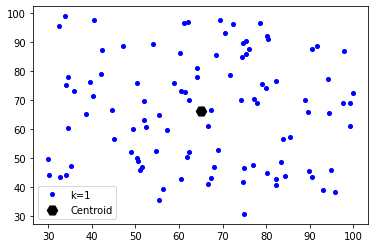

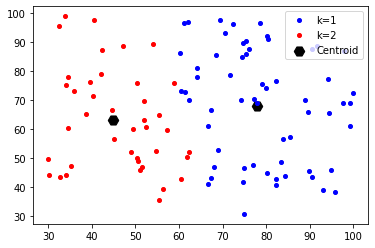

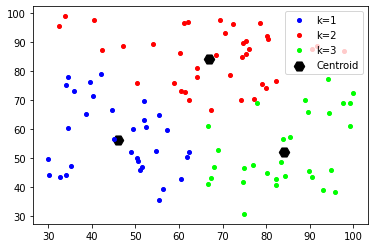

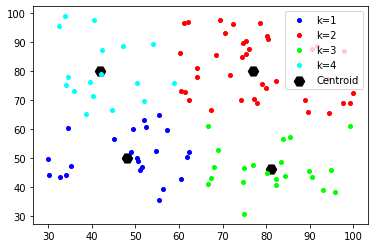

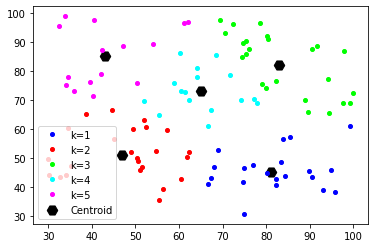

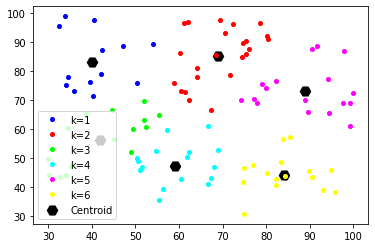

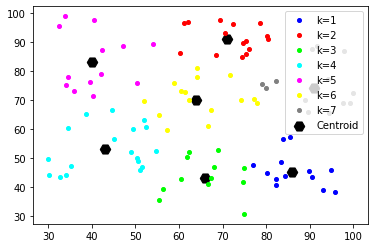

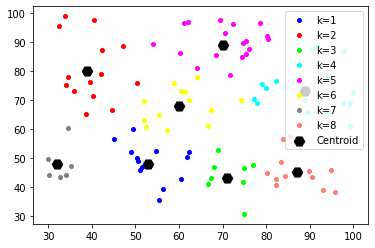

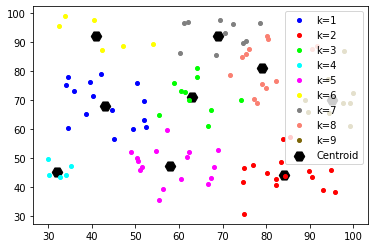

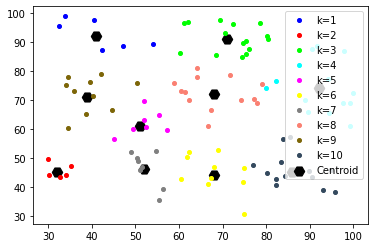

In [87]:
mx1=max(data1[:,0])
mn1=min(data1[:,0])
mx2=max(data1[:,1])
mn2=min(data1[:,1])

k_list1=[]
distortion1=[]

for k in range(1,11):
    centerX1 = np.random.randint(mn1,mx1+1,k)
    centerX2 = np.random.randint(mn2,mx2+1,k)
    #print("Center of Clusters :",centerX1, centerX2)
    
    for xx in range(0,100):
        l=[[] for xy in range(k)]
        
        for i in range(0,len(data1)):
            K_min=0
            distance_eu = EuDist(data1[i][0],data1[i][1],centerX1[0],centerX2[0])
            
            for k1 in range(0,k):
                distance1 = EuDist(data1[i][0],data1[i][1],centerX1[k1],centerX2[k1])

                if distance1<distance_eu:
                    K_min = k1
                    distance_eu = distance1

            l[K_min].append(i)

        for i in range(0,k):
            xx1=0
            xx2=0
            for j in l[i]:
                xx1+=data1[j][0]
                xx2+=data1[j][1]
            if len(l[i])!=0:
                centerX1[i]=xx1/len(l[i])
                centerX2[i]=xx2/len(l[i])

    KMeans(centerX1,centerX2,data1)
    k_list1.append(k)
    distortion1.append(elbowDistance(centerX1,centerX2,data1))

**-------------------------------------------------------------------------------------------**

> For Dataset 2.

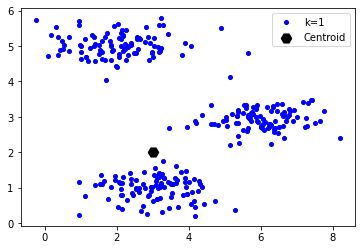

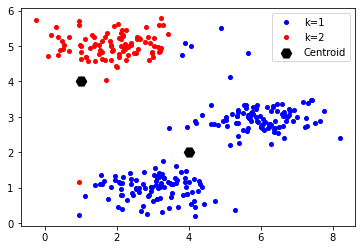

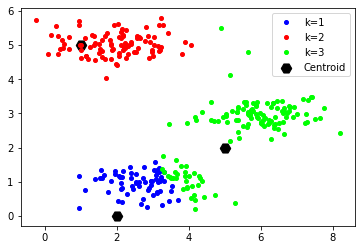

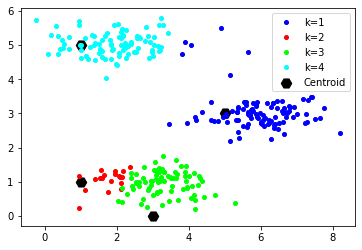

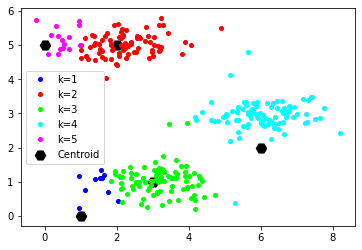

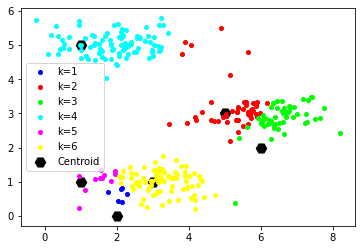

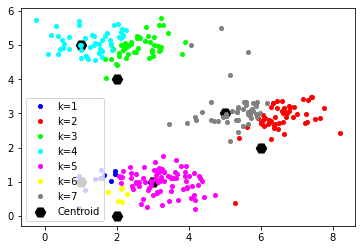

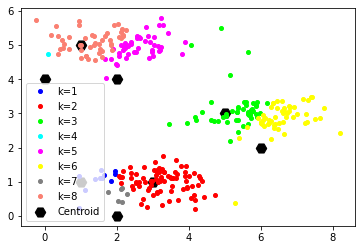

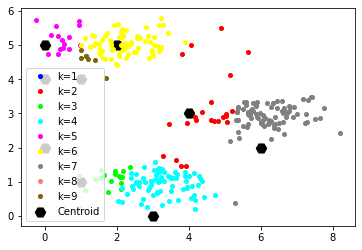

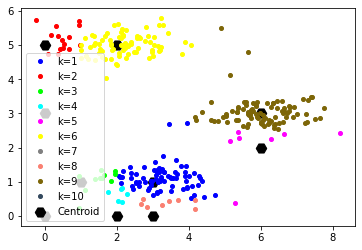

In [88]:
mx1=max(data2[:,0])
mn1=min(data2[:,0])
mx2=max(data2[:,1])
mn2=min(data2[:,1])

k_list2=[]
distortion2=[]

for k in range(1,11):
    centerX1 = np.random.randint(mn1,mx1+1,k)
    centerX2 = np.random.randint(mn2,mx2+1,k)
    #print("Center of Clusters :", centerX1, centerX2)

    for xx in range(0,100):
        l=[ [] for xy in range(k)]
        
        for i in range(0,len(data2)):
            K_min=0
            distance_eu = EuDist(data2[i][0],data2[i][1],centerX1[0],centerX2[0])

            for k1 in range(0,k):
                distance2 = EuDist(data2[i][0],data2[i][1],centerX1[k1],centerX2[k1])
                
                if distance2<distance_eu:
                    K_min = k1
                    distance_eu = distance2

            l[K_min].append(i)
        
        for i in range(0,k):
            xx1=0
            xx2=0

            for j in l[i]:
                xx1+=data2[j][0]
                xx2+=data2[j][1]

            if len(l[i])!=0:
                centerX1[i]=xx1/len(l[i])
                centerX2[i]=xx2/len(l[i])
                
    KMeans(centerX1,centerX2,data2)
    k_list2.append(k)
    distortion2.append(elbowDistance(centerX1,centerX2,data2))

**####################################################################**

**Question 4 -**	Utilizing the Elbow method to find out the optimal number of Clusters. (i.e. K).

> Elbow Method for Dataset 1.

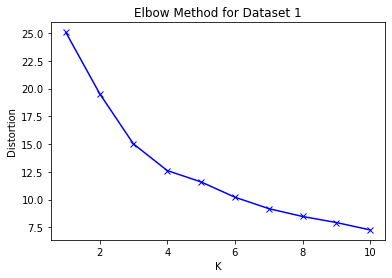

Hence for Dataset 1, we can't decide the number of optimal clusters (i.e. the value of K) by Elbow Method.


In [89]:
plt.plot(k_list1, distortion1, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title("Elbow Method for Dataset 1")
plt.show()

print("Hence for Dataset 1, we can't decide the number of optimal clusters (i.e. the value of K) by Elbow Method.")

**-------------------------------------------------------------------------------------------**

> Elbow Method for Dataset 2.

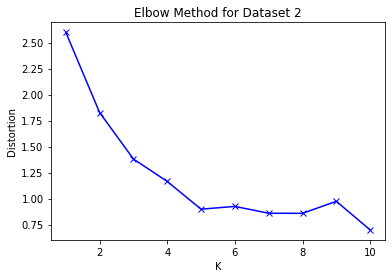

Hence for Dataset 2, from the graph, the number of optimal clusters = K = 3, by Elbow Method.


In [90]:
plt.plot(k_list2, distortion2, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title("Elbow Method for Dataset 2")
plt.show()

print("Hence for Dataset 2, from the graph, the number of optimal clusters = K = 3, by Elbow Method.")

**---------------------- END OF CODE ----------------------**